In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import profile
import time

# Problem 3: Solving Sudoku Puzzle using Backtracking
# Algorithmic Strategy: Backtracking
# Application Domain: Gaming, Puzzle Solvers

In [2]:
# 0 denotes empty cells
sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Initial Sudoku Grid:")
for row in sudoku_grid:
    print(row)

Initial Sudoku Grid:
[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 7, 9]


In [3]:
# Function to check if placing num is valid
def is_valid(board, row, col, num):
    # Check row
    if num in board[row]:
        return False
    
    # Check column
    for r in range(9):
        if board[r][col] == num:
            return False
    
    # Check 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for r in range(start_row, start_row + 3):
        for c in range(start_col, start_col + 3):
            if board[r][c] == num:
                return False
    return True

# Recursive Backtracking Function
def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:  # Empty cell
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0  # Backtrack
                return False
    return True


In [4]:
import copy
board = copy.deepcopy(sudoku_grid)  # To keep original intact

start_time = time.time()
if solve_sudoku(board):
    print("\nSolved Sudoku Grid:")
    for row in board:
        print(row)
else:
    print("No solution exists.")
end_time = time.time()

print(f"\n⏱ Time Taken: {end_time - start_time:.4f} seconds")



Solved Sudoku Grid:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]

⏱ Time Taken: 0.0270 seconds


In [5]:
empty_cells = sum(row.count(0) for row in sudoku_grid)
time_taken = end_time - start_time

print(f"Empty Cells Initially: {empty_cells}")
print(f"Time Taken to Solve: {time_taken:.6f} seconds")

Empty Cells Initially: 51
Time Taken to Solve: 0.026978 seconds


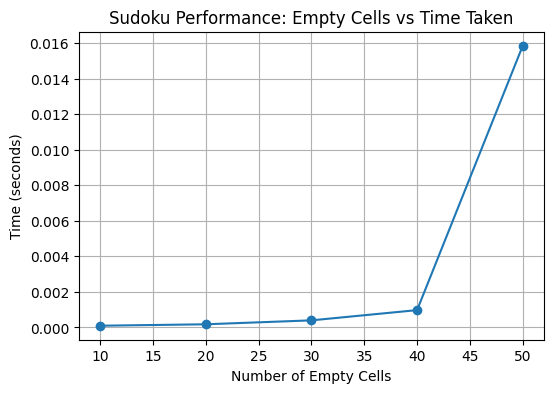

In [6]:
# Experiment: Record solving time for puzzles with different # of empty cells
empty_list = [10, 20, 30, 40, 50]
time_list = []

for empties in empty_list:
    # Generate random board with "empties" empty cells from solved puzzle
    test_board = copy.deepcopy(board)
    removed = 0
    while removed < empties:
        r, c = np.random.randint(0, 9), np.random.randint(0, 9)
        if test_board[r][c] != 0:
            test_board[r][c] = 0
            removed += 1
    
    start = time.time()
    solve_sudoku(test_board)
    time_list.append(time.time() - start)

# Plot
plt.figure(figsize=(6,4))
plt.plot(empty_list, time_list, marker="o")
plt.title("Sudoku Performance: Empty Cells vs Time Taken")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()
